In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math
import sympy.plotting.plot as symplot

# Computing Limits

In [5]:
x = sym.symbols('x')
fx = x**3

lim_pnt = 1.5
lim = sym.limit(fx, x, lim_pnt)

print(lim, lim_pnt**3)

display(Math('\\lim_{x\\to %g} %s = %g' %(lim_pnt, sym.latex(fx), lim)))

3.37500000000000 3.375


<IPython.core.display.Math object>

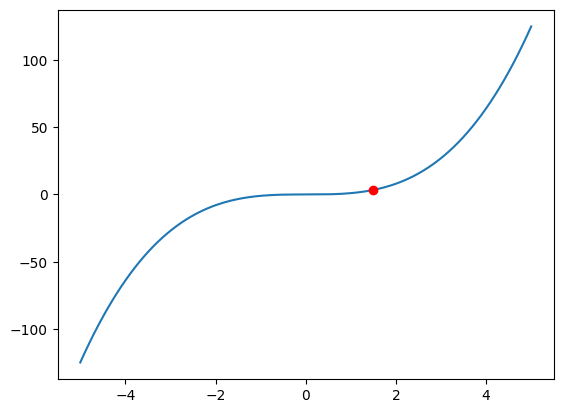

In [13]:
fxx = sym.lambdify(x, fx)
fxx(2)

xx = np.linspace(-5, 5, 200)

plt.plot(xx, fxx(xx))
plt.plot(lim_pnt, lim, 'ro')
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

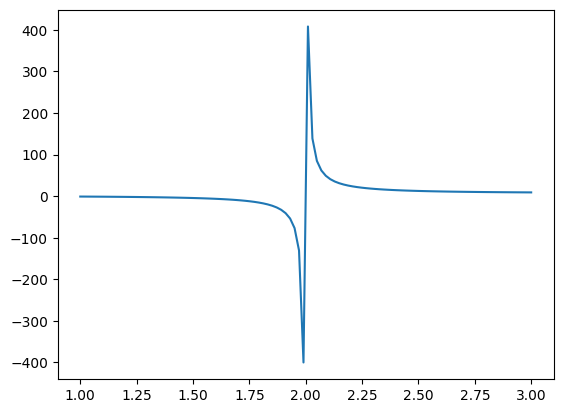

In [15]:
fx = (x**2)/(x-2)
fxx = sym.lambdify(x, fx)
xx = np.linspace(1, 3, 102)

lim_pnt = 2
lim_neg = sym.limit(fx, x, lim_pnt, dir='-')
lim_pos = sym.limit(fx, x, lim_pnt, dir='+')

plt.plot(xx, fxx(xx))
display(Math('\\lim_{x\\to %g^-} %s = %g' %(lim_pnt, sym.latex(fx), lim_neg)))
display(Math('\\lim_{x\\to %g^+} %s = %g' %(lim_pnt, sym.latex(fx), lim_pos)))

plt.show()

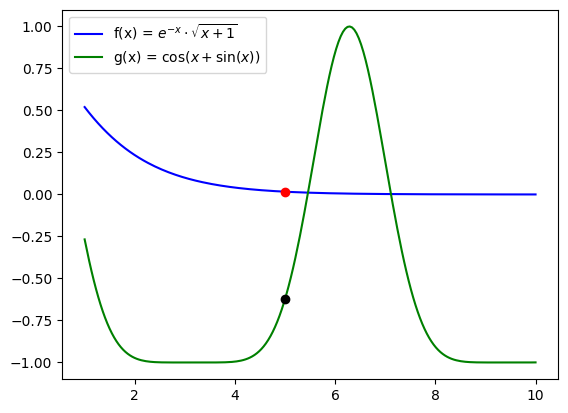

In [2]:
# f(x) = e^-x * sqrt(x + 1)
# g(x) = cos(x + sin(x))

x = sym.symbols('x')
fx = sym.exp(-x) * sym.sqrt(x + 1)
fxx = sym.lambdify(x, fx)
xx = np.linspace(1, 10, 200)

lim_pnt_fx = 5
lim_fx = sym.limit(fx, x, lim_pnt_fx)

plt.plot(xx, fxx(xx),'b',label='f(x) = $e^{-x} \\cdot \\sqrt{x + 1}$')
plt.plot(lim_pnt_fx, lim_fx, 'ro')

gx = sym.cos(x + sym.sin(x))
gxx = sym.lambdify(x, gx)
lim_pnt_gx = 5
lim_gx = sym.limit(gx, x, lim_pnt_gx)

plt.plot(xx, gxx(xx),'g',label='g(x) = $\\cos(x + \\sin(x))$')
plt.plot(lim_pnt_gx, lim_gx, 'ko')

plt.legend()
plt.show()

In [18]:
lim_pnt = 5

# compute the limit of f/g
hx = fx / gx
lim_fgx = sym.limit(hx, x, lim_pnt)

display(Math('\\frac{\\lim_{x \\to %g} f(x)}{\\lim_{x \\to %g} g(x)} = \\frac{%g}{%g} = %g' \
             %(lim_pnt, lim_pnt, lim_fx, lim_gx, lim_fx / lim_gx)))

display(Math('\\lim_{x \\to %g} \\frac{f(x)}{g(x)} = %g' %(lim_pnt, lim_fgx)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Piecewise Functions

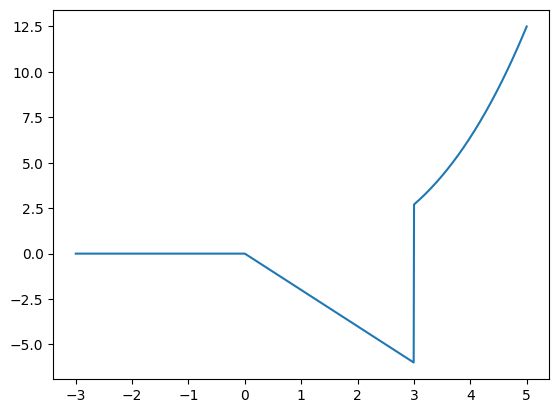

In [24]:
x = sym.symbols('x')

piece1 = 0
piece2 = -2*x
piece3 = x**3 / 10

fx = sym.Piecewise( (piece1, x < 0), (piece2, (x >= 0) & (x < 3)), (piece3, x >= 3) )
fx

fxx = sym.lambdify(x, fx)
xx = np.linspace(-3, 5, 1234)

plt.plot(xx, fxx(xx))
plt.show()

<IPython.core.display.Math object>

<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in log
  return select([less_equal(x, 0),True], [x**3,log(x)/log(2)], default=nan)
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Fo

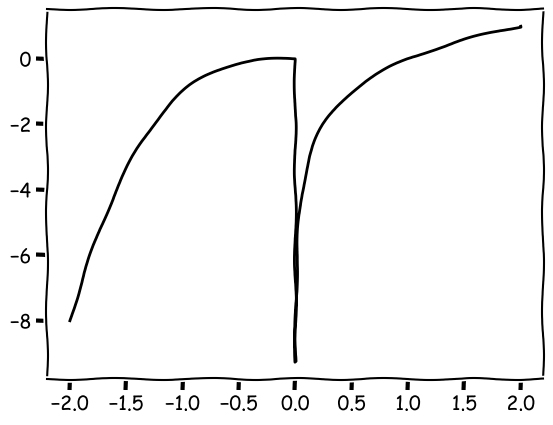

In [5]:
x = sym.symbols('x')
xx = np.linspace(-2, 2, 1234)

piece1 = x**3
piece2 = sym.log(x,2)

fx = sym.Piecewise( (piece1, x <= 0), (piece2, x > 0) )
display(Math('f(x) = ' + sym.latex(fx)))

fxx = sym.lambdify(x, fx)

with plt.xkcd():
  plt.plot(xx, fxx(xx), 'k')
plt.show()

# Derivatives

## Derivatives of Polynomials

In [9]:
# Derivative of a polynomial:
# df/dx*(a*x^n) = n*a*x^(n-1)

x = sym.symbols('x')
fx = x**2
dfx = sym.diff(fx)

# Leibniz notation
display(Math('f(x) = %s, \\quad \\frac{df}{dx} = %s' %(sym.latex(fx), sym.latex(dfx))))

# Lagrange notation
display(Math('f(x) = %s, \\quad f\' = %s' %(sym.latex(fx), sym.latex(dfx))))

# Newton notation
display(Math('f(x) = %s, \\quad \\dot{f} = %s' %(sym.latex(fx), sym.latex(dfx))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

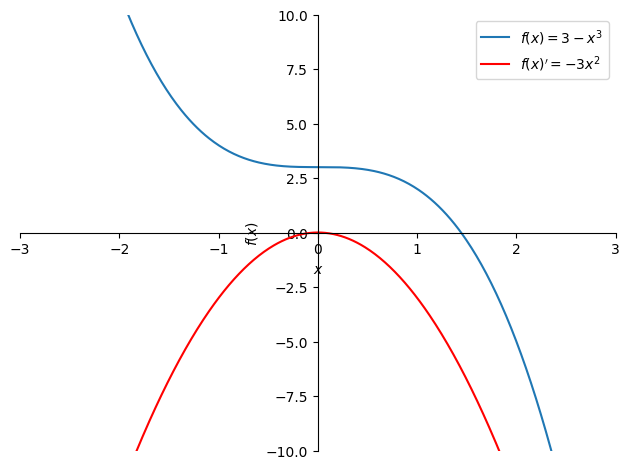

In [19]:
fx = 3 - x**3
range_x = (x,-5,5)
dfx = sym.diff(fx)

p = symplot(fx, range_x, show=False)
p.extend(symplot(sym.diff(fx), range_x, show=False))
p[1].line_color = 'r'
p[0].label = '$f(x) = %s$' %sym.latex(fx)
p[1].label = '$f(x)\' = %s$' %sym.latex(dfx)

p.legend = True
p.ylim = [-10,10]
p.xlim = [-3,3]
p.show()

In [14]:
# Summation rule:
# (f + g)' = f' + g'

# Product rule:
# (f * g)' = f' * g + f * g'
# (f * g)' != f' * g'

x = sym.symbols('x')

fx = 3 + 2*x - 5*x**2 + 7*x**4
gx = 4*x**2 + x**5

d_fx = sym.diff(fx)
d_gx = sym.diff(gx)
d_fx_plus_gx = sym.diff(fx + gx)
d_fx_times_gx = sym.diff(fx * gx)

display(Math('\\text{Without applying the product rule:}'))
display(Math('\\quad (f\\times g)\' = %s' %sym.latex(sym.expand(d_fx_times_gx))))
display(Math('\\quad f\'\\times g\' = %s' %sym.latex(sym.expand(d_fx*d_gx))))

display(Math('\\text{Applying the product rule:}'))
display(Math('\\quad (f\\times g)\' = %s' %sym.latex(sym.expand(d_fx_times_gx))))
display(Math('\\quad f\'\\times g + f\\times g\' = %s' %sym.latex(sym.expand(d_fx*gx + fx*d_gx))))

display(Math('\\text{With applying the sum rule:}'))
display(Math('\\quad (f + g)\' = %s' %sym.latex(sym.expand(d_fx_plus_gx))))
display(Math('\\quad f\' + g\' = %s' %sym.latex(sym.expand(d_fx + d_gx))))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Derivatives of Trig Functions

In [10]:
# Circular derivatives
# df/dx of cos(x) -> -sin(x)
# df/dx of -sin(x) -> -cos(x)
# df/dx of -cos(x) -> sin(x)
# df/dx of sin(x) -> cos(x)

q = sym.symbols('q')
fq = sym.cos(q)

for i in range(0, 5):
  display(Math('\\frac{d}{dx}[%s] = %s' %(sym.latex(fq), sym.latex(sym.diff(fq)))))
  fq = sym.diff(fq)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

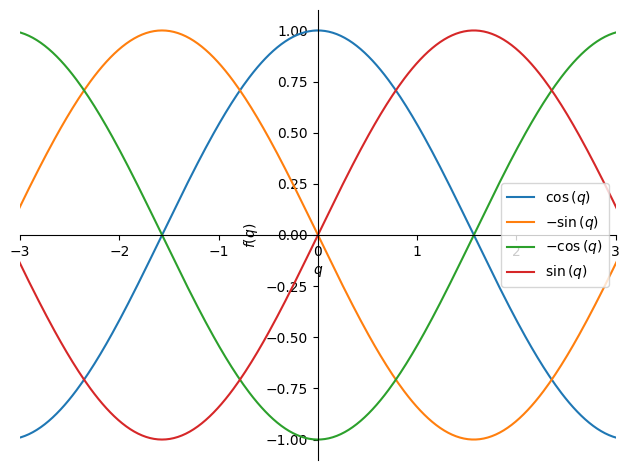

In [15]:
fq = sym.cos(q)

for i in range(0, 4):
  if i == 0:
    p = symplot(fq, show=False, label='$%s$' %sym.latex(fq))
  else:
    p.extend(symplot(fq, show=False, label='$%s$' %sym.latex(fq)))
  fq = sym.diff(fq)

p.legend = True
p.xlim = [-3,3]
p.show()

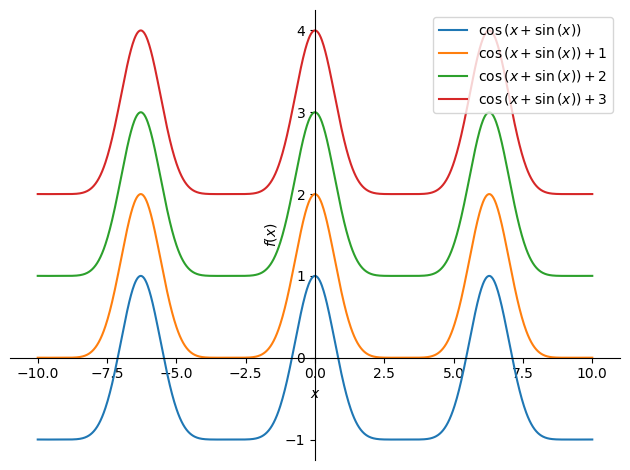

In [42]:
x,a = sym.symbols('x a')

f = sym.cos(x + sym.sin(x))
fax = f + a

for i in range(0, 4):
  if i == 0:
    p = symplot(fax.subs(a,i), show=False, label='$%s$' %sym.latex(fax.subs(a,i)))
  else:
    p.extend(symplot(fax.subs(a,i), show=False, label='$%s$' %sym.latex(fax.subs(a,i))))

p.legend = True
p.show()

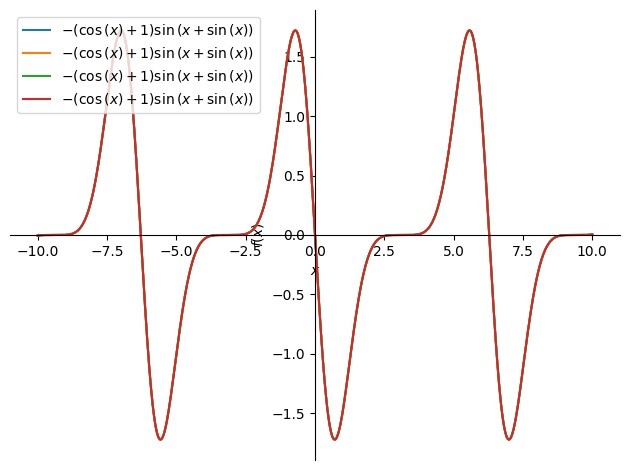

In [52]:
x,a = sym.symbols('x a')

f = sym.cos(x + sym.sin(x)) + a

for i in range(0, 4):
  fax = sym.diff(f.subs(a,i))
  if i == 0:
    p = symplot(fax, show=False, label='$%s$' %sym.latex(fax.subs(a,i)))
  else:
    p.extend(symplot(fax, show=False, label='$%s$' %sym.latex(fax.subs(a,i))))

# p.xlim = [-5,5]
p.legend = True
p.show()

## Tangent Lines

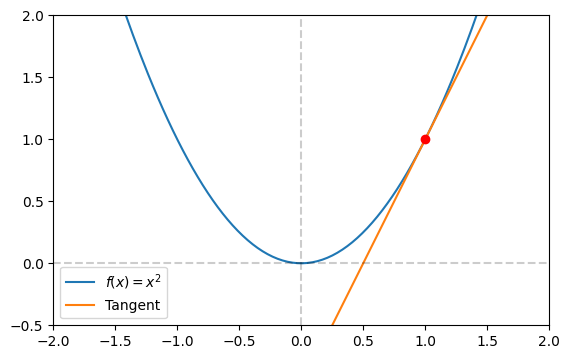

In [19]:
# tangentline = f'(a) * (x - xa) + f(a)
x = sym.symbols('x')

# define the function and its derivative
f = x**2
df = sym.diff(f)

# define the point of tangency
xa = 1

# get the function and derivative value at x_a
fa = f.subs(x, xa)
dfa = df.subs(x, xa)

xx = np.linspace(-2, 2, 200)
fun = sym.lambdify(x, f)(xx)
# df_fun = sym.lambdify(x, df)(xx)

# compute the tangent line
tanline = dfa*(xx - xa) + fa

plt.plot(xx, fun, label='$f(x) = x^2$')
plt.plot(xx, tanline, label='Tangent')
plt.plot(xa, fa, 'ro')

plt.legend()

plt.axis('square')
plt.axis([-2,2,-.5,2])

ax = plt.gca()
plt.plot(ax.get_xlim(), [0,0], 'k--', alpha=.2)
plt.plot([0,0], ax.get_ylim(), 'k--', alpha=.2)

plt.show()

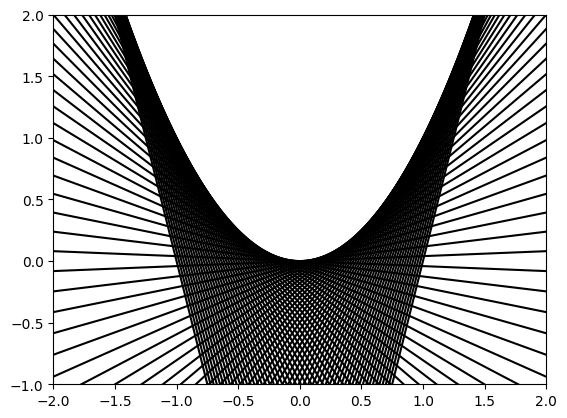

In [30]:
x = sym.symbols('x')

f = x**2
df = sym.diff(f)

xas = np.linspace(-2, 2, 100)

xx = np.linspace(-2, 2, 200)

plt.plot(xx, sym.lambdify(x, f)(xx), 'k')

for i in range(0, len(xas)):
  fa = f.subs(x, xas[i])
  dfa = df.subs(x, xas[i])

  tanline = dfa*(xx - xas[i]) + fa
  plt.plot(xx, tanline, 'k')

plt.axis('square')
plt.axis([-2,2,-1,2])
plt.show()